## Evaluar el resultado 


#### Existen diferentes métodos para evaluar el error entre la predicción y el valor real. 

**1. Mean Absolute Error.** Es el valor absoluto de los errores, es la métrica más fácil de entender y la podemos interpretar como el promedio del error. 

$$ MAE = \frac{1}{n}\sum_{i=1}^{n} \left | y_i - \widehat{y_i} \right | $$

**2. Mean Squared Error.** Es el promedio del error cuadrado y se utiliza cuando se tienen grandes errores. Esto se debe a que el término al cuadrado aumenta exponencialmente los errores más grandes en comparación con los más pequeños.

$$ MSE = \frac{1}{n}\sum_{i=1}^{n}  (y_i - \widehat{y_i})^2 $$

**3. Root Mean Squared Error.** Es el más popular de las métricas de evaluacion para regresiones porque se puede interpretar en las mismas unidades que $y$ lo que facilita entender la información que proporciona. 

$$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}  (y_i - \widehat{y_i})^2} $$


**4. Relative Absolute Error (también conocido como: Residual Sum of Square).** Toma el total del error absoluto y lo normaliza al dividirlo por el total del error absoluto de cada uno de los puntos de evaluación. 

$$ RAE = \frac{\sum_{i=1}^{n} \left | y_i - \widehat{y_i} \right |}{\sum_{i=1}^{n} \left | y_i - \overline{y_i} \right |}$$

**5. Relative Squared Error.** Es muy similiar al RAE pero su utilización se acerca más a la comunidad de data science debido a que se utiliza para calcular $R^2$ 

$$ RSE = \frac{\sum_{i=1}^{n}  (y_i - \widehat{y_i})^2 }{\sum_{i=1}^{n}  (y_i - \overline{y_i})^2 } $$ 

**6. R squared.** No es un error por si mismo, pero es la métrica más popular en el mundo de data science para evaluar el rendimiento de un modelo de regresión. Representa que tan cerca están las predicciones de los valores reales en una escala de -inf a 1. 

Entre más alto el valor de $R^2$ , mejor rendimiento tiene el modelo. El valor máximo que puede alcanzar es 1.

$$ R^2 = 1- RSE $$ 

# Regresión Lineal simple

El objetivo de una regresión lineal simple (univariada) es modelar una relación entre una característica simple (variable explicativa x) y una respuesta de valor continuo (variable de destino y)

La ecuación de un modelo lineal con una variable explicativa se define del siguiente modo: 

$$ y = w_o + w_1x $$

Donde el peso $w_0$ representa el eje y interceptado y $w_1$ es el coeficiente ponderado de la variable explicativa. **El objetivo es aprender los pesos de la ecuación lineal anterior para describir la relación entre la variable explicativa y la variable de destino.**


En otras palabras la regresión lineal se puede definir como la búsqueda de la recta que mejor se ajuste a través de puntos de muestra.

La línea que se ajusta a los puntos se conoce como **recta de regresión** y la diferencia entre la recta de regresión y los puntos de muestra se conocen como **residuos** o **errores**.

# ¿Cómo se ajusta la recta?

- Existen variados métodos para ajustar la recta a los puntos, para el ejercicio actual vamos a utilizar el modelo de sklearn: LinearRegression(), el cual busca minimizar la suma de los errores al cuadrado


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model # Modulo

In [38]:
df = pd.read_csv("FuelConsumptionCo2.csv") #Características de autos y emisión de CO2
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [39]:
df.shape

(1067, 13)

In [40]:
df.columns[4:]

Index(['ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE',
       'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

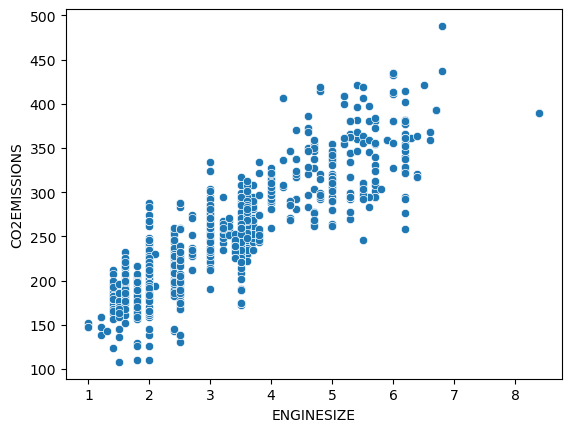

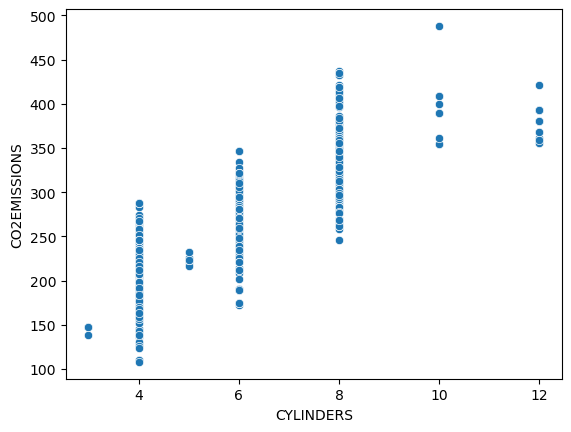

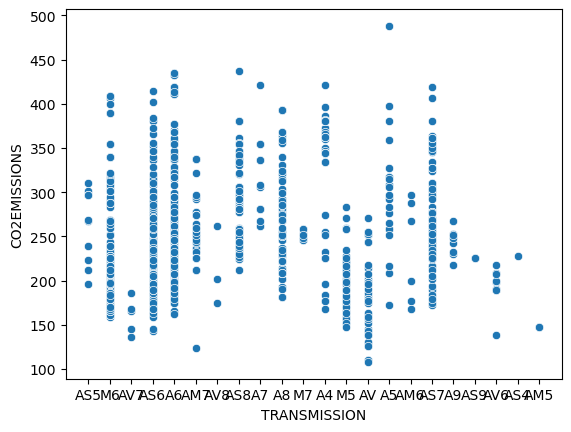

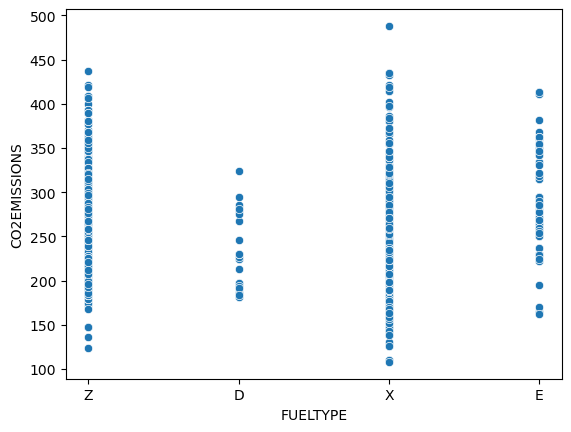

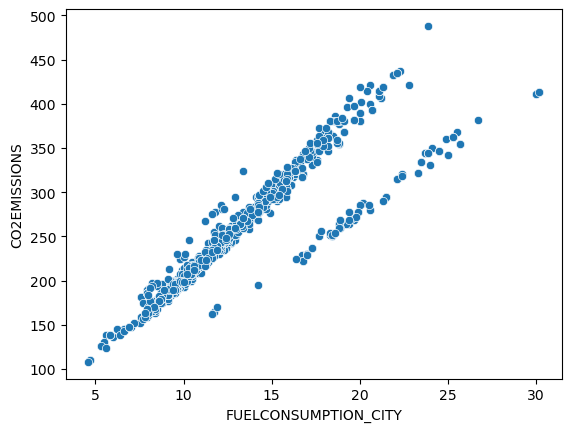

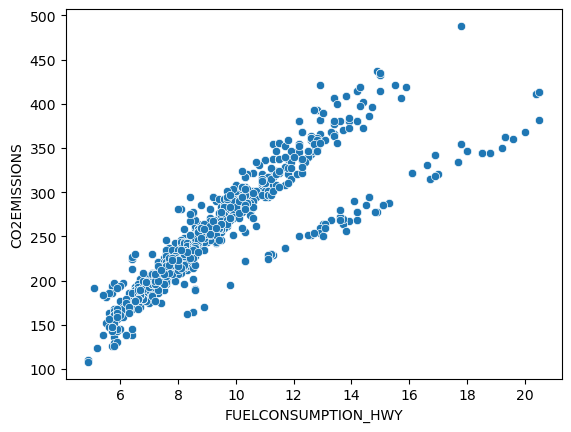

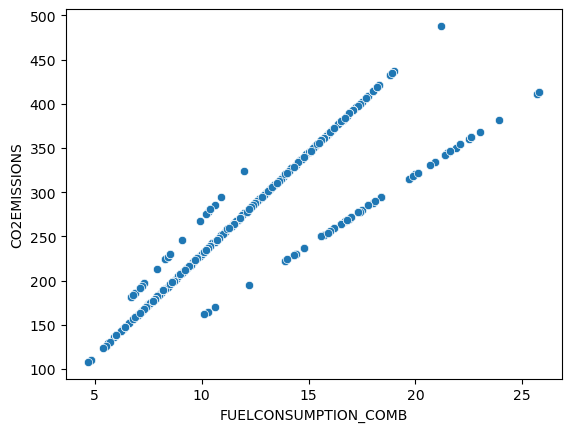

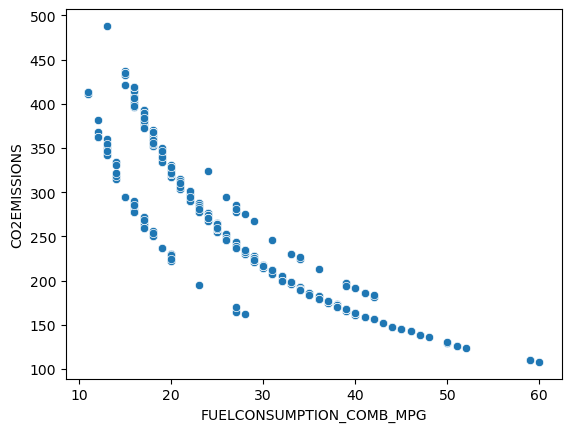

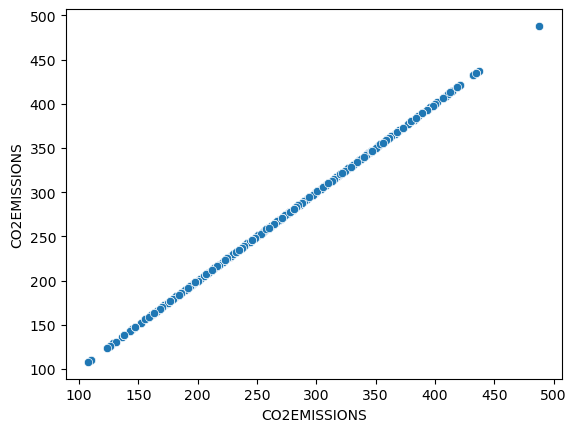

In [41]:
# Se muestran un par de atributos vs la emisión de CO2

for i in df.columns[4:]:
    sns.scatterplot(x = df[i] , y = df.CO2EMISSIONS)
    plt.show()

In [42]:
# Se selecciona el tamaño del motor vs la emisión de CO2
df[["ENGINESIZE", "CO2EMISSIONS"]]

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
1062,3.0,271
1063,3.2,264
1064,3.0,271
1065,3.2,260


In [43]:
# X es la variable explicativa 
# y es la variable destino

X = df[["ENGINESIZE"]] # podemos poner un dataframe o un numpy values
y = df["CO2EMISSIONS"]

In [44]:
#Se observan las dimensiones
X.shape, y.shape

((1067, 1), (1067,))

In [45]:
# Algoritmo de regresión lineal de scikitlearn
from sklearn import linear_model
regresion_lineal = linear_model.LinearRegression() # cargo un objeto clase (modelo)
regresion_lineal

LinearRegression()

In [46]:
modelo2 = linear_model.LinearRegression() 

In [47]:
regresion_lineal.fit(X, y) # se ajusta/ se entrena a partir de unos datos

LinearRegression()

In [48]:
# Encontramos los coeficientes de la recta  
print ('w_1: ', regresion_lineal.coef_) # y = ax+b (a)
# con los coeficioentes se puede ver el efecto marginal de cada variable
print ('w_0: ', regresion_lineal.intercept_) #(b) # termino independiente

w_1:  [39.12519979]
w_0:  125.3040994953569


In [49]:
regresion_lineal.intercept_

125.3040994953569

In [50]:
regresion_lineal.predict(X.iloc[0:2])
# el predict es la aplicación de la formula
# en concreto es el f(X)

array([203.55449907, 219.20457898])

## Vamos a calcular $f(X)$ con la formula $f(X)=\widehat{y}=w_1 X+w_0$

In [51]:
w_0 = regresion_lineal.intercept_
w_1 = regresion_lineal.coef_

In [52]:
X.ENGINESIZE.values # solo por operar

array([2. , 2.4, 1.5, ..., 3. , 3.2, 3.2])

In [53]:
# Ecuacion de una recta y = m*x + b
# CO2 = w_1 (coef) * EngSize + w_0 (intercept)
# lo pongo en formato numpy solo para calcular la predicción a mano y para graficar
X_ENGINESIZE = X.ENGINESIZE.values
Y_pred_mano = w_1*X_ENGINESIZE + w_0

In [54]:
Y_pred_mano

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

In [55]:
regresion_lineal.predict(X)

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

### Generalmente utilizaremos el .predict() 

Como parametro de entrada un conjunto con la misma estructura de datos que X y queremos que prediga que valores ($\widehat{y}$) debería de tener cada elemento

In [56]:
#yhat son las predicciones del valor que deberia de tener
# cada uno de los patrones de X_test

yhat = regresion_lineal.predict(X) # se aplica la formula
print(yhat[:5])

[203.55449907 219.20457898 183.99189918 262.24229875 262.24229875]


In [57]:
yhat

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

In [58]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

## Una vez que tengamos nuestro modelo, queremos observar los errores

In [59]:
from sklearn.metrics import mean_squared_error
yhat = regresion_lineal.predict(X)
mean_squared_error(y, yhat) # le paso las y reales y las predicciones

946.3140527188749

In [60]:
mean_squared_error(y, yhat)**(1/2)

30.762217942126263

In [61]:
np.mean((y-yhat)**2)

946.3140527188749

# $ R^2 $ = R squared
### .score() y  r2_score()
R squared. No es un error por si mismo, pero es la métrica más popular en el mundo de data science para evaluar el rendimiento de un modelo de regresión. Representa que tan cerca están las predicciones de los valores reales en una escala de -inf a 1.

In [62]:
# Dos formas de calcular el r2, utilizando .score() o r2_score()
regresion_lineal.score(X,y) # r2_score  # internamente predice y calcula la r2
# modelo.score

0.7641458597854816

In [63]:
yhat[0]

203.55449906878033

In [64]:
from sklearn.metrics import r2_score #r2_score 
yhat = regresion_lineal.predict(X)
r2_score(y, yhat) # le paso las y reales y las predicciones

0.7641458597854816

# Gráfico de errores 1

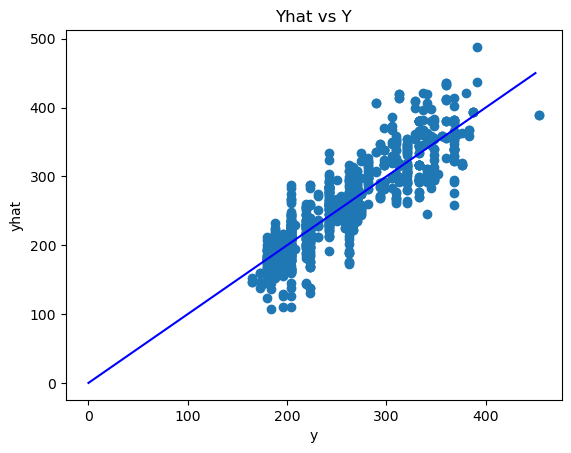

In [65]:
plt.title("Yhat vs Y")
plt.plot(yhat, y,"o")
plt.plot([0,450],[0,450],"b")
plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

# grafico de errores 2

In [66]:
error = y-yhat

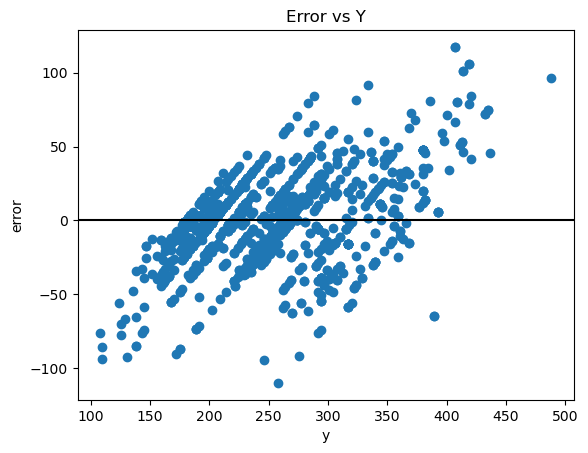

In [67]:
error = y-yhat
plt.title("Error vs Y")
plt.plot(y,error,"o")
# plt.plot([0,0],[450,0],"b")
plt.axhline(y=0, color="k")
plt.xlabel("y")
plt.ylabel("error")
plt.show()

# grafico de errores 3

In [68]:
error = y-yhat

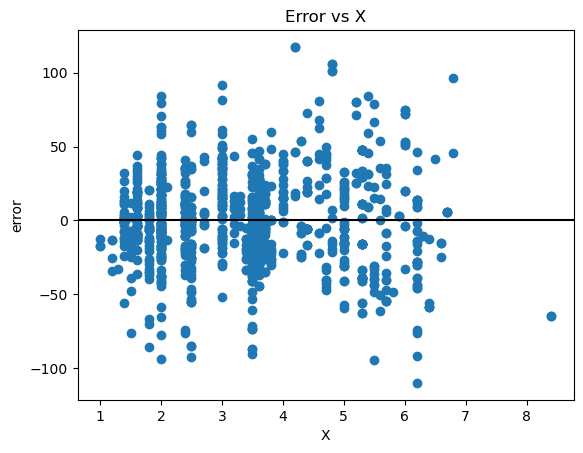

In [69]:
plt.title("Error vs X")
plt.plot(X,error,"o")
# plt.plot([0,0],[450,0],"b")
plt.axhline(y=0, color="k")
plt.xlabel("X")
plt.ylabel("error")
plt.show()

# Distribución de errores

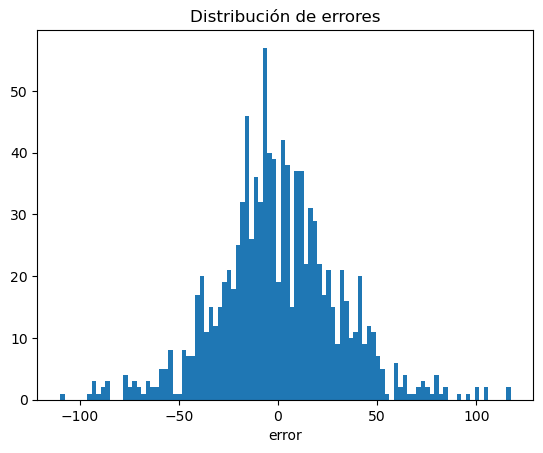

In [70]:
plt.hist(error, bins=100)
plt.title("Distribución de errores")
plt.xlabel("error")
plt.show()